In [1]:
import pandas as pd
df=pd.read_csv('zomato.csv')
print(df)

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
56247  Four Points by Sheraton Bengaluru, 43/3, White...   
56248  Number 10, Garudachar Palya, Mahadevapura, Whi...   
56249  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56250  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
56251  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe    

In [2]:
print(df.isnull().sum())

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64


In [19]:
# Drop rows with missing values for columns 'address', 'name', 'online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', and 'listed_in(type)'
df = df.dropna(subset=['address', 'name', 'online_order', 'book_table', 'votes', 'location', 'rest_type', 'cuisines', 'listed_in(type)'])

# Convert the 'rate' column to a numeric data type before filling missing values
#df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Fill missing values in the 'rate' column with the mean
#df['rate'].fillna(df['rate'].mean(), inplace=True)
#df.drop(columns=['rate'], inplace=True)
# Fill missing values in the 'phone' column with a default value (you can choose any other strategy like 'Unknown' or 'Not Available')
df['phone'].fillna('Not Available', inplace=True)

# Drop the 'dish_liked' column, as it has a significant number of missing values (you can choose to keep it if it is essential for your analysis)
#df.drop(columns=['dish_liked'], inplace=True)

# Handle missing values in the 'approx_cost(for two people)' column (you can choose to fill with the mean or median or drop rows)
# For example, to fill with the mean:
# Step 1: Convert the column to string data type
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)

# Step 2: Remove non-numeric characters and convert to numeric data type
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',', '').str.extract('(\d+)', expand=False).astype(float)

# Step 3: Fill missing values with the mean
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace=True)

# Convert text data to lowercase for consistency (Example: 'name' and 'dish_liked')
df['name'] = df['name'].str.lower()
#df['dish_liked'] = df['dish_liked'].str.lower()
# Drop rows with any missing values in any column
df = df.dropna()


# Check the updated DataFrame after handling missing values
print(df.isnull().sum())

# Save the preprocessed data to a new file, replace 'preprocessed_zomato_data.csv' with the desired filename
df.to_csv('preprocessed_zomato_data.csv', index=False)


address                        0
name                           0
online_order                   0
book_table                     0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [24]:
# Load the preprocessed Zomato dataset
df = pd.read_csv('preprocessed_zomato_data.csv')

# Basic data exploration
print("info:",df.info())
print("describe:",df.describe())
print("head:",df.head())
print("tail:",df.tail())
print("shape:",df.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51394 entries, 0 to 51393
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      51394 non-null  object 
 1   name                         51394 non-null  object 
 2   online_order                 51394 non-null  object 
 3   book_table                   51394 non-null  object 
 4   votes                        51394 non-null  object 
 5   phone                        51394 non-null  object 
 6   location                     51394 non-null  object 
 7   rest_type                    51394 non-null  object 
 8   cuisines                     51394 non-null  object 
 9   approx_cost(for two people)  51394 non-null  float64
 10  listed_in(type)              51394 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.3+ MB
info: None
describe:        approx_cost(for two people)
count                 5.1394

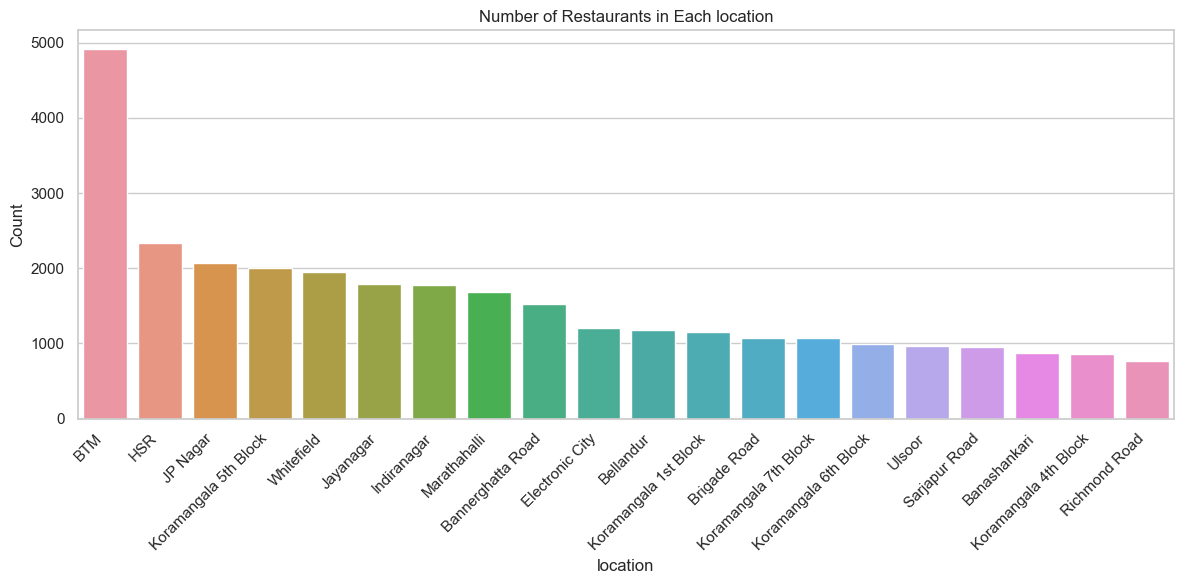

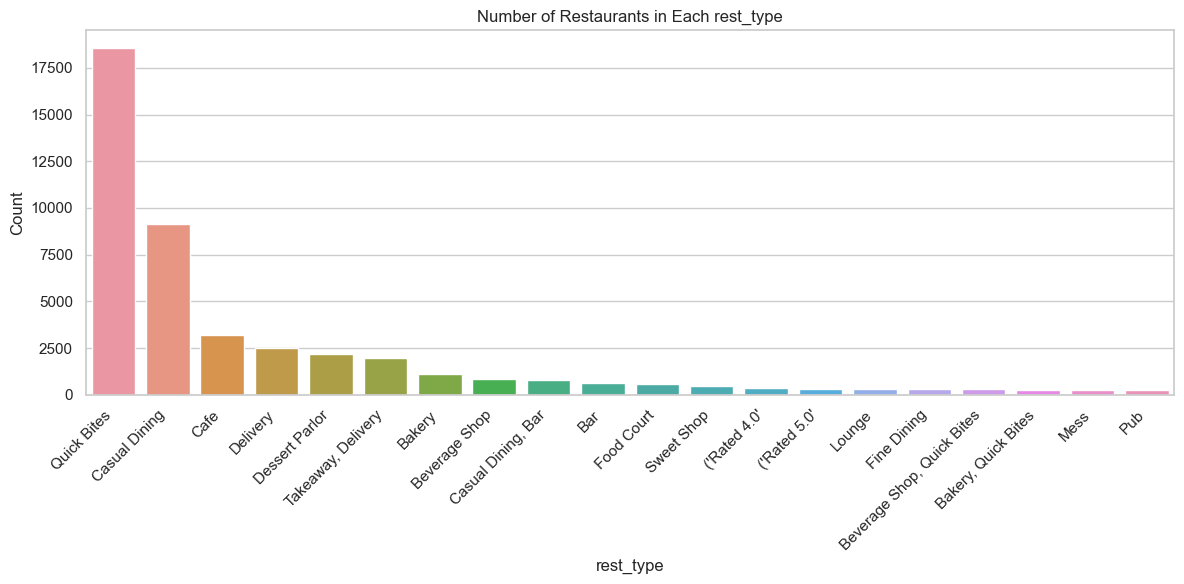

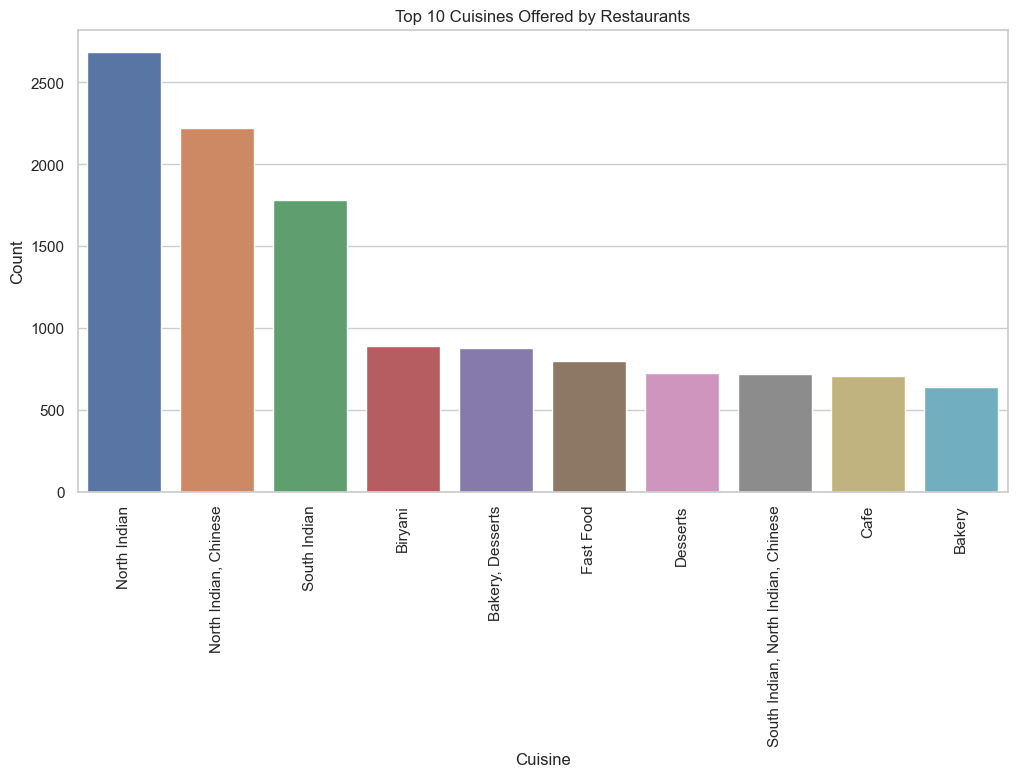

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed Zomato dataset
df = pd.read_csv('preprocessed_zomato_data.csv')

# Data visualization

# Define a threshold for the number of unique values to display on the x-axis for count plots
max_unique_values = 20

# Define a list of columns for which we want to create count plots
count_plot_columns = ['location', 'rest_type']

# Define a list of columns for which we want to create box plots
box_plot_columns = ['location']

# Set Seaborn style
sns.set(style='whitegrid')

# Loop through the count plot columns and create count plots
for column in count_plot_columns:
    try:
        plt.figure(figsize=(12, 6))
        unique_values_count = df[column].nunique()
        if unique_values_count > max_unique_values:
            top_n_values = df[column].value_counts().nlargest(max_unique_values).index
            sns.countplot(x=column, data=df[df[column].isin(top_n_values)], order=top_n_values)
        else:
            sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.title(f'Number of Restaurants in Each {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.tight_layout()  # Adjust plot layout to prevent overlap of labels
        plt.show()
    except Exception as e:
        print(f"Error while creating count plot for column '{column}': {str(e)}")

# Countplot of types of cuisines offered
plt.figure(figsize=(12, 6))
sns.countplot(x='cuisines', data=df, order=df['cuisines'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.title('Top 10 Cuisines Offered by Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()